In [1]:
%matplotlib inline
import numpy as np
from scipy.signal import hilbert, chirp
import matplotlib.pyplot as plt
from hwpy.common.cordic import CORDIC

# Signal generation

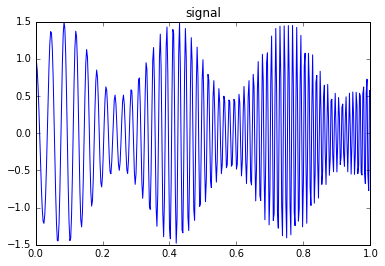

In [2]:
duration = 1.0
fs = 400.0
samples = int(fs * duration)
t = np.arange(samples) / fs

signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0 * np.pi * 3.0 * t))

analytic_signal = hilbert(signal)
plt.plot(t, signal)
plt.title('signal')
plt.show()

# NUMPY angle

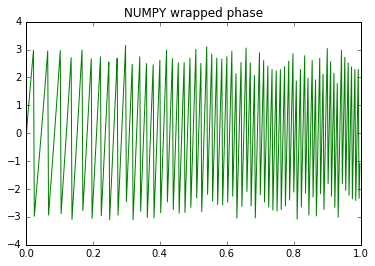

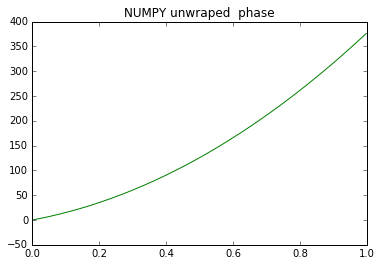

In [3]:
ref_instantaneous_phase = np.angle(analytic_signal)

plt.plot(t, ref_instantaneous_phase, color='g')
plt.title('NUMPY wrapped phase')
plt.show()

plt.plot(t, np.unwrap(ref_instantaneous_phase), color='g')
plt.title('NUMPY unwraped  phase')
plt.show()

# CORDIC angle

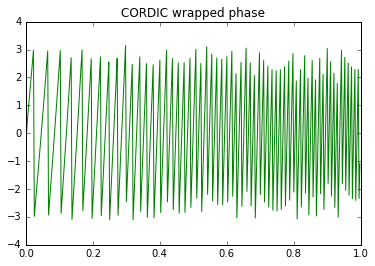

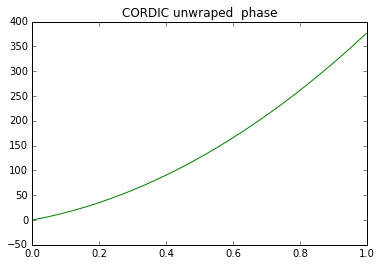

In [4]:
cord = CORDIC(18)
# cord_instantaneous_phase = cord.angle(analytic_signal)

cord_instantaneous_phase = cord.angle(analytic_signal)

plt.plot(t, cord_instantaneous_phase, color='g')
plt.title('CORDIC wrapped phase')
plt.show()

plt.plot(t, np.unwrap(cord_instantaneous_phase), color='g')
plt.title('CORDIC unwraped  phase')
plt.show()

### Error

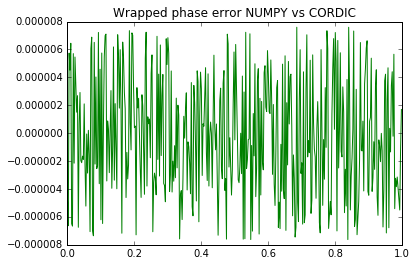

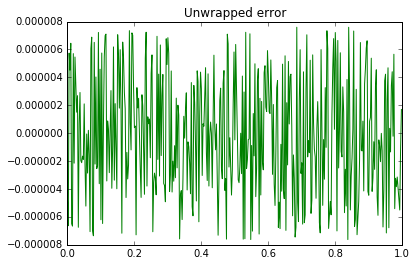

In [5]:
wrap_error = cord_instantaneous_phase - ref_instantaneous_phase
plt.plot(t, wrap_error, color='g')
plt.title('Wrapped phase error NUMPY vs CORDIC')
plt.show()

unwrap_error = np.unwrap(cord_instantaneous_phase) - np.unwrap(ref_instantaneous_phase)
plt.plot(t, unwrap_error, color='g')
plt.title('Unwrapped error')
plt.show()

THIS IS FIXED NOW

WTF is this error on wrapped phase?? Unwrapping gets rid of the error...

2*pi error spikes....

It is because CORDIC does not hold the result in PI range


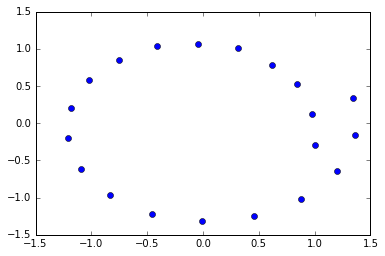

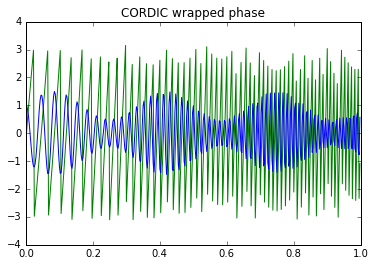

In [7]:
n = 20
plt.plot(analytic_signal.real[:n], analytic_signal.imag[:n], 'o')
plt.show()

# for z, sig, wrap_err in zip(cord_instantaneous_phase, analytic_signal, wrap_error):
#     print('I: {}, Q: {}'. format(sig.real, sig.imag))
# #     if z < -np.pi:
#     if abs(wrap_err) > 0.01:
#         print('FUCK: ', wrap_err)
        
plt.plot(t, cord_instantaneous_phase, color='g')
plt.plot(t,analytic_signal.real)
plt.title('CORDIC wrapped phase')
plt.show()